<a href="https://colab.research.google.com/github/alibjn/My-3D-Photo-Inpainting/blob/main/3D_Photo_Inpainting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[CVPR 2020] 3D Photography using Context-aware Layered Depth Inpainting** 
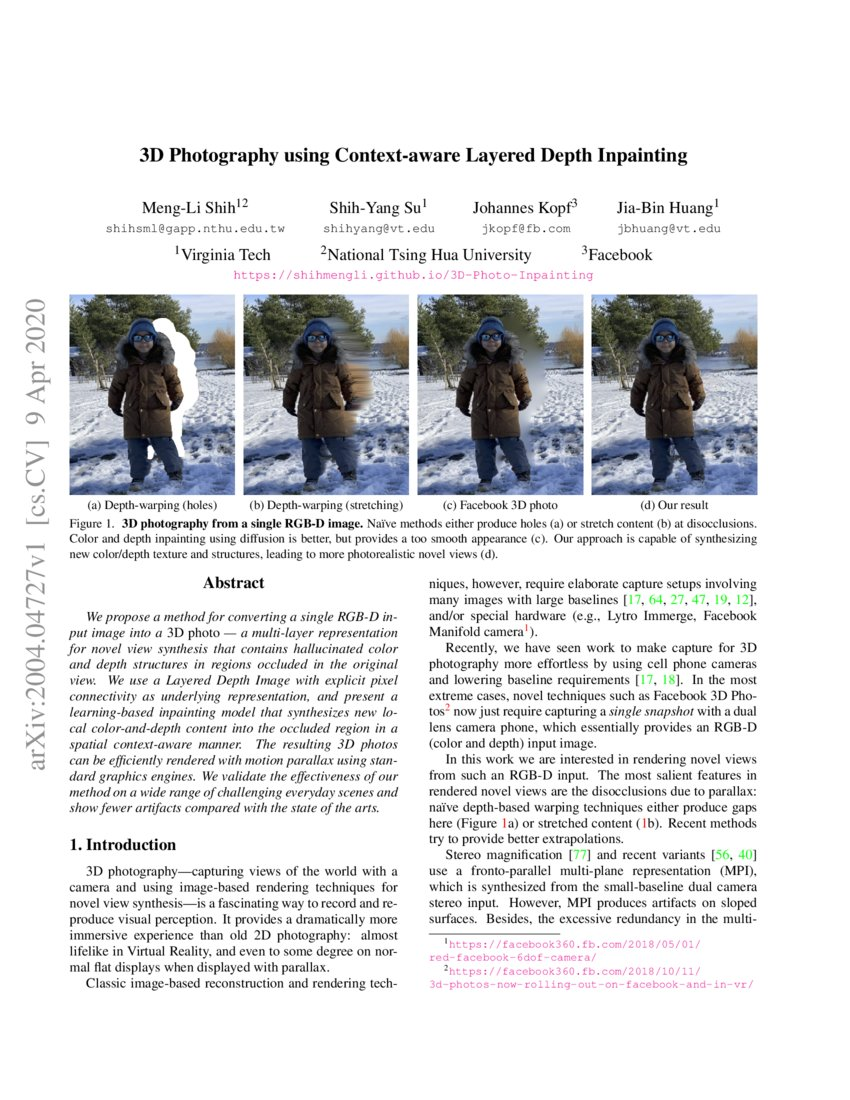

**Prepare environment**

---



In [ ]:
!pip install -q vispy==0.6.4
!pip install -q moviepy==1.0.2
!pip install -q transforms3d==0.3.1
!pip install -q networkx==2.3

Visualize depth estimations and final results:


---



In [ ]:
from IPython.display import HTML
from base64 import b64encode
def show_inpainting(image_file, video_file):
  image_content = open(image_file, 'rb').read()
  video_content = open(video_file, 'rb').read()
  image_data = "data:image/jpg;base64," + b64encode(image_content).decode()
  video_data = "data:video/mp4;base64," + b64encode(video_content).decode()
  html = HTML(f"""
  <img height=756 src={image_data} />
  <video height=756 controls loop>
        <source src={video_data} type='video/mp4'>
  </video>
  """)
  return html
def show_depth_estimation(image_file, depth_file):
  image_content = open(image_file, 'rb').read()
  depth_content = open(depth_file, 'rb').read()
  image_data = "data:image/jpg;base64," + b64encode(image_content).decode()
  depth_data = "data:image/png;base64," + b64encode(depth_content).decode()
  html = HTML(f"""
  <img height=756 src={image_data} />
  <img height=756 src={depth_data} />
  """)
  return html

**Making 3D photos**

*Download script and pretrained model*

---



In [ ]:
%cd /content/
!git clone https://github.com/vt-vl-lab/3d-photo-inpainting.git
%cd 3d-photo-inpainting
!git checkout 60ce4fcc5f8dc37a2b65bb72ef6287addc024bbf
!sh download.sh

/content
Cloning into '3d-photo-inpainting'...
remote: Enumerating objects: 350, done.
remote: Total 350 (delta 0), reused 0 (delta 0), pack-reused 350
Receiving objects: 100% (350/350), 130.13 MiB | 41.77 MiB/s, done.
Resolving deltas: 100% (192/192), done.
/content/3d-photo-inpainting
Note: checking out '60ce4fcc5f8dc37a2b65bb72ef6287addc024bbf'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 60ce4fc Update download.sh
downloading from filebox ...
--2020-11-20 01:37:47--  https://filebox.ece.vt.edu/~jbhuang/project/3DPhoto/model/color-model.pth
Resolving filebox.ece.vt.edu (filebox.ece.vt.edu)... 128.173.88.43
Connecti

Clear up the demo files, provided by the project, and download our own content

---



In [ ]:
!rm depth/*
!rm image/*
!rm video/*
!gdown --id 1b4MjYo_D5sps8F6JmYnomandLyQhjo6Z -O config.yml
!gdown --id 1VCctvs3y8s76rk-POvCbHD7toqc8ujjL -O image/bjn.jpg


rm: cannot remove 'depth/*': No such file or directory
rm: cannot remove 'image/*': No such file or directory
rm: cannot remove 'video/*': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1b4MjYo_D5sps8F6JmYnomandLyQhjo6Z
To: /content/3d-photo-inpainting/config.yml
100% 1.22k/1.22k [00:00<00:00, 2.08MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VCctvs3y8s76rk-POvCbHD7toqc8ujjL
To: /content/3d-photo-inpainting/image/bjn.jpg
100% 183k/183k [00:00<00:00, 64.6MB/s]


**Execute the 3D Photo Inpainting**

Note: The 3D photo generation process  might take some time, 
depending on the available computing resources.

In [ ]:
!python main.py --config config.yml

running on device 0
  0% 0/1 [00:00<?, ?it/s]Current Source ==>  bjn
Running depth extraction at 1605837843.7505314
initialize
device: cpu
start processing
  processing image/bjn.jpg (1/1)
torch.Size([1, 3, 384, 288])
finished
Start Running 3D_Photo ...
Loading edge model at 1605837858.048658
Loading depth model at 1605837868.8070016
Loading rgb model at 1605837869.6910603
Writing depth ply (and basically doing everything) at 1605837870.514587
Writing mesh file mesh/bjn.ply ...
Making video at 1605838013.828704
fov: 53.13010235415598
Moviepy - Building video video/bjn_dolly-zoom-in.mp4.
Moviepy - Writing video video/bjn_dolly-zoom-in.mp4

  0% 0/1 [03:27<?, ?it/s]
t:   0% 0/241 [00:00<?, ?it/s, now=None]
t:   1% 2/241 [00:00<00:36,  6.51it/s, now=None]
t:   1% 3/241 [00:00<00:33,  7.05it/s, now=None]
t:   7% 18/241 [00:00<00:22,  9.88it/s, now=None]
t:  14% 33/241 [00:00<00:15, 13.71it/s, now=None]
t:  20% 47/241 [00:00<00:10, 18.71it/s, now=None]
t:  24% 57/241 [00:01<00:08, 21.04it/s

**Estimated depth**

---




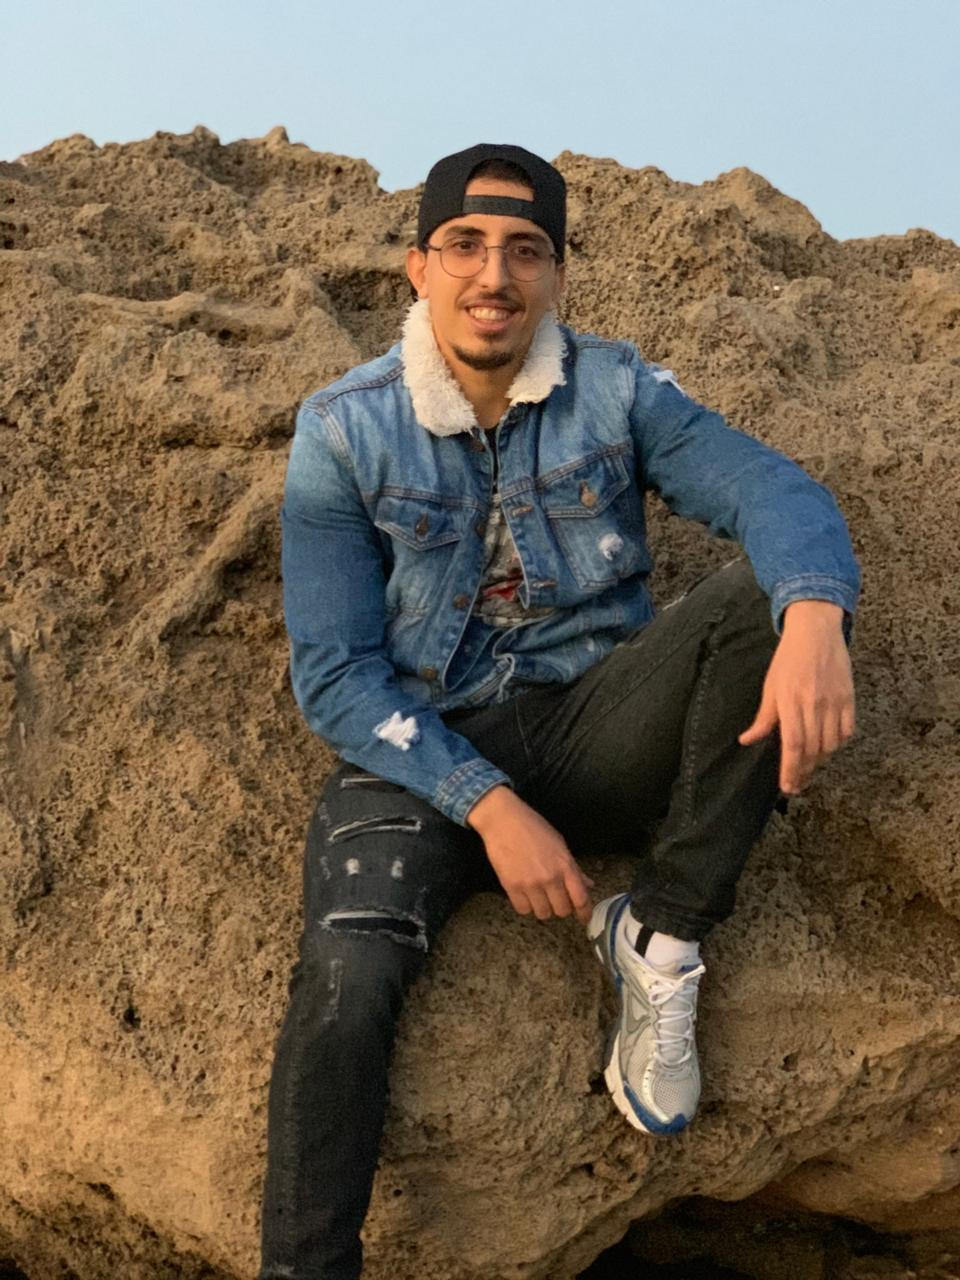
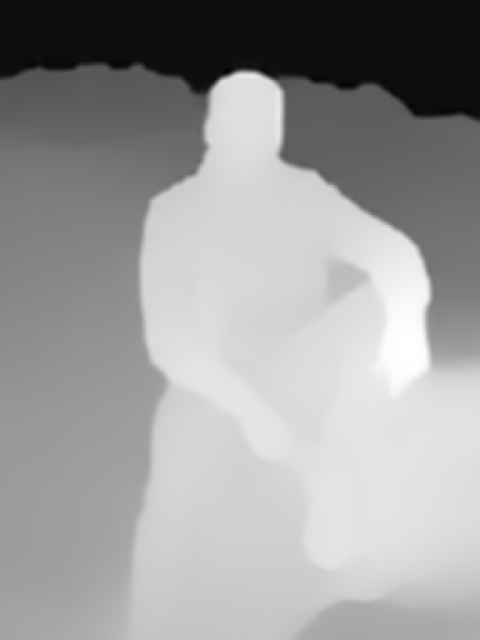

In [ ]:
show_depth_estimation('image/bjn.jpg', 'depth/bjn.png')

**Results**

---




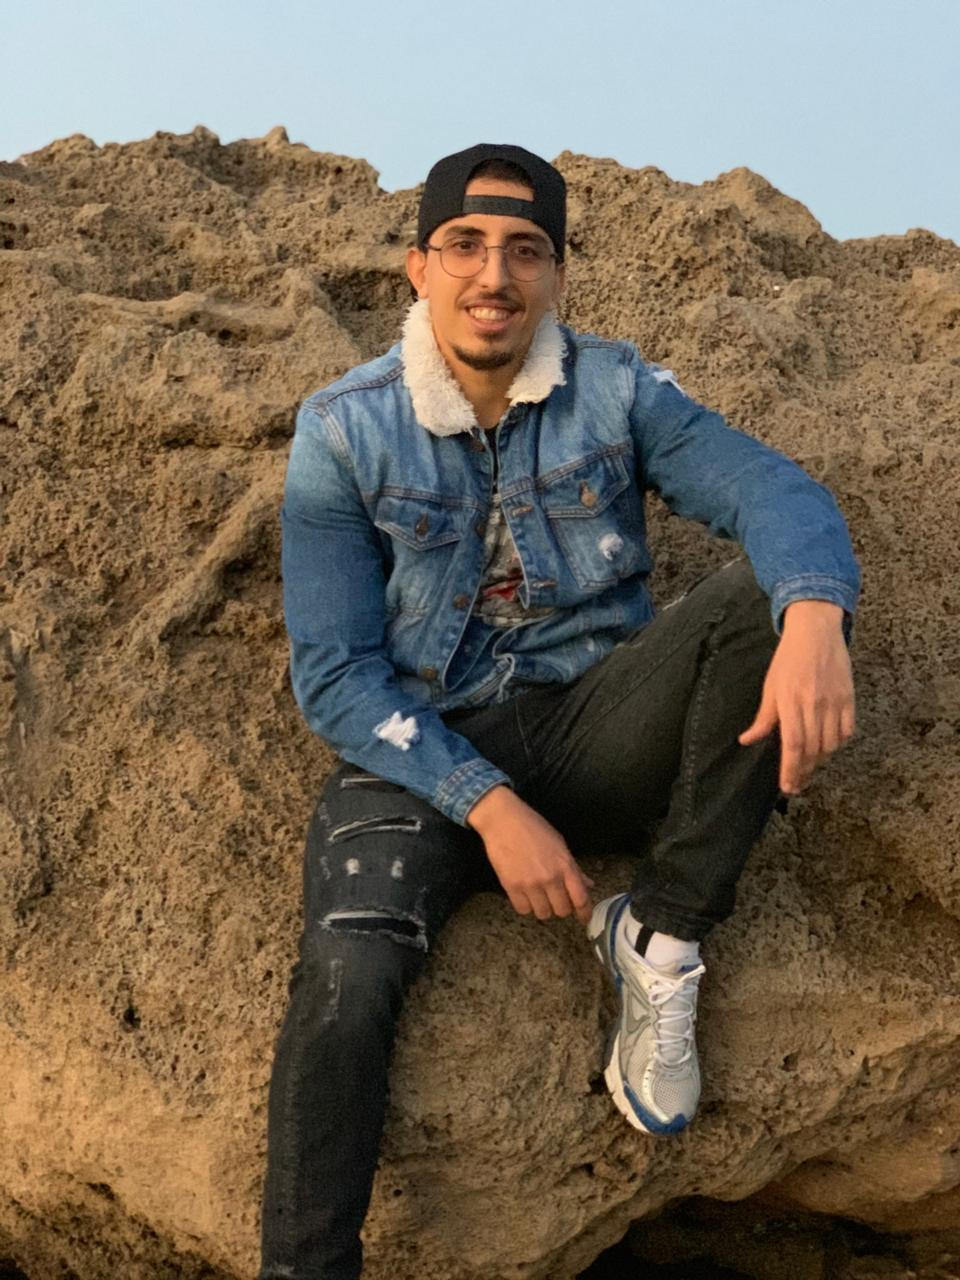

In [ ]:
show_inpainting('image/bjn.jpg', 'video/bjn_circle.mp4')